In [2]:
from PIL import Image
import numpy as np
import scipy.misc as misc
import pandas as pd
import re
import scipy
import matplotlib.pyplot as plt
import os
import json
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import scipy.io

print(scipy.__version__)

0.19.1


In [16]:
dir_path = r'H:\TONG_well_inverse'
output_dir =  r'H:\TONG_data_raw_log10'


is_image = True
is_tra = False
is_test = False


if is_image:
    output_dir = os.path.join( output_dir , 'images')
else:
    output_dir = os.path.join( output_dir , 'annotations')
         


if is_tra:
    output_dir = os.path.join(output_dir, 'training')
else:
    output_dir = os.path.join(output_dir, 'validation')


if is_test:
    _start = 1
    _seqs = 2
    _num = 21
else:
    if is_tra:
        _start = 1
        _seqs = 901
        _num = 21
    else:
        _start = 901
        _seqs = 1001
        _num = 21
    
seqs = range(_start,_seqs)
seqs = ['F'+str(i).zfill(7) for i in seqs]

num = range(1,_num)
num = ['Stress'+str(i).zfill(2)+'.JSON' for i in num]

Stress_cnt = 100
material_cnt = 9

#         plt.imshow(np.uint8(dataset), cmap='gray')
#         plt.colorbar()
#         plt.show()


for seq in seqs:
    print(seq)
    if is_image:
        ims = []
        for i in num:
            filepath = os.path.join(dir_path, seq, i)        
            with open(filepath) as f:
                data = json.loads(f.read())['21*21']

            dataset = np.array(data).reshape([21,21])

            dim_y = []
            for i in range(np.shape(dataset)[0] ):
                dim_x = []
                for j in range(np.shape(dataset)[1]-1):
                    mid = (dataset[i][j] + dataset[i][j+1])/2
                    dim_x.append(mid)
                dim_y.append(dim_x)

            dataset = np.array(dim_y).transpose(1,0)

            dim_y = []
            for i in range(np.shape(dataset)[0] ):
                dim_x = []
                for j in range(np.shape(dataset)[1]-1):
                    mid = (dataset[i][j] + dataset[i][j+1])/2
                    dim_x.append(mid)
                dim_y.append(dim_x)

            dataset = np.array(dim_y).transpose(1,0).flatten()
            

    #         scaler = MinMaxScaler(feature_range=(0, Stress_cnt))
    #         dataset = scaler.fit_transform(dataset)
    #         dataset = [int(round(i)) for i in dataset]
            dataset = np.array(dataset).reshape([20,20])*1000
            ims.append(dataset)
        ims = np.array(ims)
        
#         data = round(ims[0])
#         plt.imshow(data)
#         plt.colorbar()
#         plt.show()
#         print(data)

        ims = np.transpose(ims,(1, 2, 0))
        np.save(os.path.join(output_dir, seq+'_image'), ims)


    
    
    if not is_image:
        with open(os.path.join(dir_path, seq, 'material.JSON')) as f:
            data = json.loads(f.read())['20*20']
        data = np.log10(data)
    #     print(data)
        scaler = MinMaxScaler(feature_range=(0, material_cnt))
        dataset = scaler.fit_transform(data)
        dataset = [int(round(i)) for i in dataset]
        ims = np.array(dataset).reshape([20,20])
    #     print(ims)
        np.save(os.path.join(output_dir, seq+'_anno'), ims)
    
    



F0000901
F0000902
F0000903
F0000904
F0000905
F0000906
F0000907
F0000908
F0000909
F0000910
F0000911
F0000912
F0000913
F0000914
F0000915
F0000916
F0000917
F0000918
F0000919
F0000920
F0000921
F0000922
F0000923
F0000924
F0000925
F0000926
F0000927
F0000928
F0000929
F0000930
F0000931
F0000932
F0000933
F0000934
F0000935
F0000936
F0000937
F0000938
F0000939
F0000940
F0000941
F0000942
F0000943
F0000944
F0000945
F0000946
F0000947
F0000948
F0000949
F0000950
F0000951
F0000952
F0000953
F0000954
F0000955
F0000956
F0000957
F0000958
F0000959
F0000960
F0000961
F0000962
F0000963
F0000964
F0000965
F0000966
F0000967
F0000968
F0000969
F0000970
F0000971
F0000972
F0000973
F0000974
F0000975
F0000976
F0000977
F0000978
F0000979
F0000980
F0000981
F0000982
F0000983
F0000984
F0000985
F0000986
F0000987
F0000988
F0000989
F0000990
F0000991
F0000992
F0000993
F0000994
F0000995
F0000996
F0000997
F0000998
F0000999
F0001000


[[1 1 1 2 4 5 6 5 1 1 2 1 1 1 3 3 4 2 3 2]
 [1 1 1 1 2 2 5 2 1 2 3 1 1 1 1 2 3 1 2 1]
 [1 1 1 1 1 2 2 3 2 2 2 2 2 2 1 2 2 1 2 2]
 [1 0 1 1 1 1 2 3 4 2 1 1 1 2 4 3 4 2 1 2]
 [1 0 1 1 1 1 1 1 3 2 1 1 1 3 7 6 6 3 2 4]
 [1 1 1 1 1 1 1 1 1 2 3 2 1 2 2 5 5 3 2 2]
 [1 2 2 1 1 1 2 2 1 2 3 1 2 2 2 2 2 2 2 1]
 [1 1 1 2 1 3 3 2 2 2 2 2 4 3 2 1 2 2 3 1]
 [1 1 1 1 1 2 2 2 1 2 1 5 9 4 3 2 1 2 3 1]
 [1 1 1 1 1 1 2 1 1 2 1 2 3 7 3 2 3 3 2 2]
 [1 1 1 0 0 1 1 1 1 2 1 2 1 2 3 4 4 4 3 3]
 [0 0 1 1 1 1 1 1 0 1 0 1 1 1 3 3 3 2 1 3]
 [0 0 0 1 1 1 0 0 0 0 0 1 2 3 5 3 2 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 2 2 3 6 5 5 2 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1 1 1 5 4 2 1 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1]
 [1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


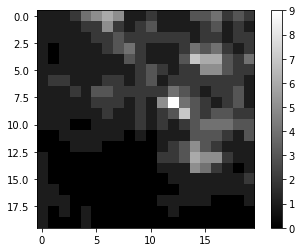

[[13 11 15 25 42 51 69 53  9 15 22 10  6 13 31 38 46 22 36 25]
 [15 10  9 11 23 26 51 27 15 20 34 15  7 13 10 19 33 12 19 14]
 [11 14 13 15 16 25 26 37 25 18 20 25 18 17 10 21 26 15 17 19]
 [ 8  5  7  9 15 15 23 36 41 26 14 10 16 26 47 37 41 22 12 19]
 [ 7  5 10  9 11 13 14 15 31 25 15 14 14 29 74 70 70 36 24 41]
 [12 11 12 10 15  9 10 11 14 18 28 21 13 17 18 51 51 30 24 20]
 [15 24 23 11 11  8 24 22 11 26 28 12 21 27 23 27 19 23 17 14]
 [15 13 14 17 15 28 28 22 18 17 27 25 42 29 19 14 17 26 35 16]
 [16 11 16 14 13 20 26 18 12 18 16 52 99 41 29 17 15 26 33 14]
 [11  9 10 10 11 11 17 12 11 21 15 25 36 74 33 23 34 30 24 18]
 [ 6  7 11  5  4  8  9  6  9 26 16 20 15 20 36 40 39 47 28 38]
 [ 3  4 13  9 11  8  6  6  5  6  5 11 15 14 28 28 32 17 11 33]
 [ 4  5  5  7  7  8  4  5  2  2  4 14 26 29 52 32 22 11 12 13]
 [15  5  2  4  2  3  1  1  2  1  4 19 27 36 66 60 53 21 10 12]
 [11  4  2  2  1  1  2  2  1  2  4  7 12 15 57 45 27 15  5 13]
 [10  3  2  1  1  1  1  1  2  2  4  5 11 10 13 10 10  9

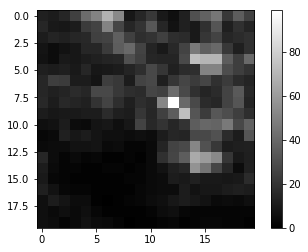

[[  3   2   3   3  39   9   3   3   4  44   3   3   3   3   2   3   3  21
    2   3]
 [ 11   8  12  12  44  17  12  10  13  49  11  12  12  11   9  11  12  28
    9  13]
 [ 20  15  22  21  51  26  21  18  22  55  19  21  21  19  17  19  22  36
   16  22]
 [ 27  20  30  28  55  32  28  24  30  59  26  29  28  26  23  26  30  42
   21  30]
 [ 32  24  35  32  59  37  33  28  35  62  31  33  33  30  27  31  35  46
   25  35]
 [ 35  26  38  36  61  40  36  31  38  64  34  37  36  33  30  34  38  49
   28  38]
 [ 37  27  41  38  62  42  38  33  41  65  37  39  38  36  32  36  41  51
   29  41]
 [ 39  28  43  40  64  44  40  35  43  66  39  41  40  38  34  38  43  53
   31  43]
 [ 44  30  48  45  67  49  45  40  48  69  44  46  45  42  40  43  48  57
   35  48]
 [ 50  32  54  50  71  55  51  46  54  73  50  52  52  49  47  50  54  62
   41  54]
 [ 54  35  58  54  73  59  55  50  58  75  55  56  56  53  51  54  58  65
   45  58]
 [ 59  42  62  58  76  64  60  55  62  78  59  60  60  57  57  59

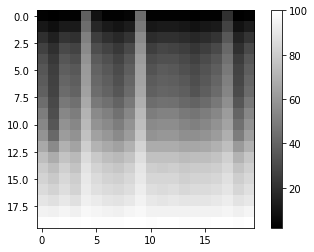

In [12]:
mat_file = r'H:\TONG_data_100_10_v1\annotations\training\F0000001_anno.npy'
# mat_file = r'H:\TONG_data_100_10\annotations\validation\F0000901_anno.npy'
data = np.load(mat_file)
print(data)
plt.imshow(np.uint8(data), cmap='gray')
plt.colorbar()
plt.show()





raw_file = r'H:\TONG_well_inverse\F0000001\material.JSON'
with open(raw_file) as f:
    data = json.loads(f.read())['20*20']
scaler = MinMaxScaler(feature_range=(0, 99))
dataset = scaler.fit_transform(data)
dataset = [int(round(i)) for i in dataset]
dataset = np.array(dataset).reshape([20,20])
print(dataset)
plt.imshow(np.array(dataset).reshape([20,20]), cmap='gray')
plt.colorbar()
plt.show()




raw_file = r'H:\TONG_data_100_10_v1\images\training\F0000001_image.npy'
    
data = np.load(raw_file)[0]
# scaler = MinMaxScaler(feature_range=(0, 99))
# dataset = scaler.fit_transform(data)
# dataset = [int(round(i)) for i in dataset]
# dataset = np.array(dataset).reshape([20,20])
print(data)
plt.imshow(data, cmap='gray')
plt.colorbar()
plt.show()


In [18]:
# 
# dir_path = r'H:\TONG_data_100_10\images\validation'
# dir_path = r'H:\TONG_data_100_10\images\training'
dir_path = r'H:\TONG_data_raw_log10\images\validation'


for filename in os.listdir(dir_path):
    if filename.endswith(".npy"):
        os.rename(os.path.join(dir_path, filename), os.path.join(dir_path, filename[:8]+'_image.npy'))

In [156]:

vgg_imangenet_path = r'C:\Users\today459\PycharmProjects\CTDataSegmentation_split\Model_zoo/imagenet-vgg-verydeep-19.mat'



data = scipy.io.loadmat(vgg_imangenet_path)

print(data.keys())
# targ= data['normalization'][0][0][0]
# print(np.shape(targ))
# print(type(targ))
# # print(targ)

# mean_pixel = np.mean(targ, axis=(0, 1))
# print(np.shape(mean_pixel))
# print(type(mean_pixel))
# print(mean_pixel)

# ones_mean_pixel = np.ones([20])
# print(zero_mean_pixel)

kernel, bias = np.squeeze(data['layers'])[2][0][0][0][0]
print(np.shape(kernel), np.shape(bias),)
print(type(kernel), type(bias))

layers = (
        'conv1_1', 'relu1_1', 'conv1_2', 'relu1_2', 'pool1',

        'conv2_1', 'relu2_1', 'conv2_2', 'relu2_2', 'pool2',

        'conv3_1', 'relu3_1', 'conv3_2', 'relu3_2', 'conv3_3',
        'relu3_3', 'conv3_4', 'relu3_4', 'pool3',

        'conv4_1', 'relu4_1', 'conv4_2', 'relu4_2', 'conv4_3',
        'relu4_3', 'conv4_4', 'relu4_4', 'pool4',

        'conv5_1', 'relu5_1', 'conv5_2', 'relu5_2', 'conv5_3',
        'relu5_3', 'conv5_4', 'relu5_4'
)

for i, name in enumerate(layers):
    layer = np.squeeze(data['layers'])[i][0][0][0][0]
    print(np.shape(layer), name, type(layer))
    if isinstance(layer, np.ndarray):
        print(np.shape(layer[0]))
    print()



# ones_kernel = np.ones([3,3,20,64])
# ones_bias = np.ones([1, 64])
# print(np.shape(ones_kernel))
# print(type(ones_kernel))



dict_keys(['classes', 'normalization', '__header__', 'layers', '__version__', '__globals__'])
(3, 3, 64, 64) (1, 64)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(2,) conv1_1 <class 'numpy.ndarray'>
(3, 3, 3, 64)

() relu1_1 <class 'numpy.str_'>

(2,) conv1_2 <class 'numpy.ndarray'>
(3, 3, 64, 64)

() relu1_2 <class 'numpy.str_'>

() pool1 <class 'numpy.str_'>

(2,) conv2_1 <class 'numpy.ndarray'>
(3, 3, 64, 128)

() relu2_1 <class 'numpy.str_'>

(2,) conv2_2 <class 'numpy.ndarray'>
(3, 3, 128, 128)

() relu2_2 <class 'numpy.str_'>

() pool2 <class 'numpy.str_'>

(2,) conv3_1 <class 'numpy.ndarray'>
(3, 3, 128, 256)

() relu3_1 <class 'numpy.str_'>

(2,) conv3_2 <class 'numpy.ndarray'>
(3, 3, 256, 256)

() relu3_2 <class 'numpy.str_'>

(2,) conv3_3 <class 'numpy.ndarray'>
(3, 3, 256, 256)

() relu3_3 <class 'numpy.str_'>

(2,) conv3_4 <class 'numpy.ndarray'>
(3, 3, 256, 256)

() relu3_4 <class 'numpy.str_'>

() pool3 <class 'numpy.str_'>

(2,) conv4_1 <class 'numpy.ndarray'>
(3, 3, 